In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

# Starter for recommendations
## 1. Grouping by cosine similarity
## 2. Grouping by similarity coefficient: 
$$sim(A,B) = \frac{count(A,B)}{count(A)*count(B)}$$
where `A,B` are cities and `count(A)` represents number of occurences of A in the dataset
## 3. Use `trip_duration` as "rating" and combine with `cities` dataset
## 4. Explore the dataset into details and find out which information are important for the recommendations
## 5. Try to evaluate and assign important aspect to each city (art, nature, spot, nightlife, ...)
## 6. Come up with explanations of the recommendations (generate multiple sample recommendations)

In [17]:
from algorithms.helpers import *

In [52]:
df_trips, df_cities = load_data()
display(df_cities.head(3))
display(df_trips.head(3))

city  hospital_availability  nightlife  female_friendly  \
0  ho-chi-minh-city                      1          4                3   
1             seoul                      2          5                5   
2          alicante                      2          3                3   

   racial_tolerance  walkability  quality_of_life  places_to_work_from  \
0                 2            5                3                    5   
1                 2            2                4                    5   
2                 2            5                4                    5   

   friendliness_to_foreigners  freedom_of_speech  startup_score  \
0                           3                  1              3   
1                           4                  4              3   
2                           4                  4              3   

   traffic_safety  ac_availability  lgbt_friendly  fun  wifi_availability  \
0               2                3              2    5                  4   
1               3                5              3    4                  5   
2               3                3              3    4                  4   

   peace  nomad_score  internet_mbs  cost_dollars_per_month  
0      3         4.14            21                    1034  
1      3         3.66            18                    2578  
2      4         3.43            27                    2135

id    user              city      country  trip_start    trip_end  \
0   0  trip_y  ho-chi-minh-city      Vietnam  2019-05-02  2020-05-31   
1   1  trip_y             seoul  South Korea  2019-04-27  2019-05-01   
2   2  trip_y  ho-chi-minh-city      Vietnam  2019-04-22  2019-04-27   

    trip_duration   latitude   longitude  
0 00:00:00.000000  10.823099  106.629664  
1 00:00:00.000000  37.550982  126.990344  
2 00:00:00.000000  10.823099  106.629664

In [19]:
df_cities.city.values

array(['ho-chi-minh-city', 'seoul', 'alicante', 'amsterdam', 'london',
       'nha-trang', 'da-nang', 'mui-ne', 'paris', 'hong-kong',
       'chiang-mai', 'ko-samui', 'bangkok', 'bilbao', 'madrid',
       'barcelona', 'nottingham', 'istanbul', 'new-york-city', 'tunis',
       'florence', 'vientiane', 'kuala-lumpur', 'sanur', 'siem-reap',
       'phnom-penh', 'sliema', 'kharkiv', 'venice', 'tenerife', 'hue',
       'hanoi', 'vienna', 'rotterdam', 'dusseldorf', 'innsbruck', 'cairo',
       'alexandria', 'riga', 'antwerp', 'antalya', 'rhodes', 'bodrum',
       'jerusalem', 'tel-aviv', 'reykjavik', 'tangier', 'fes',
       'marrakesh', 'casablanca', 'vancouver', 'chicago', 'busan',
       'osaka', 'canggu', 'san-francisco', 'las-vegas', 'reno',
       'portland', 'seattle', 'honolulu', 'tokyo', 'ko-tao', 'taipei',
       'kyoto', 'nicosia', 'milan', 'arnhem', 'rome', 'jeju-island',
       'denpasar', 'guangzhou', 'kuta', 'ubud', 'singapore',
       'los-angeles', 'nijmegen', 'berlin', 'bra

## 1. Cosine similarity
- **To be done:** Analysis, exploration of more 'similar cities', justification behind the similarities

In [5]:
import operator

city_dict = get_index_city_dict(df_cities)
def calculate_cosine_similarity(features):
    return cosine_similarity(features, features)

def cos_similarity(df, idx, how_many=10):
    features = df.drop(["city"], axis=1)
    cosine_sim = calculate_cosine_similarity(features)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:1+how_many]
    indices = [i[0] for i in sim_scores]
    d = dict(zip(df['city'].iloc[indices].values, [i[1] for i in sim_scores]))
    return sorted(d.items(), key=operator.itemgetter(1), reverse=True)


NameError: name 'get_index_city_dict' is not defined

In [6]:
cos_similarity(df_cities, city_dict['brno'], 5)

NameError: name 'cos_similarity' is not defined

## 2. Grouping by similarity coefficient
- **To be done:** Exploration of more 'similar cities' (2 obscure, 2 popular, 2 where nightlife is prominent, etc.), justification behind the similarities
$$sim(A,B) = \frac{count(A,B)}{count(A)*count(B)}$$

In [11]:
# Example:
def get_city_count(cityA, cityB):
    count_A = get_city_count(df_trips, cityA)
    count_B = get_city_count(df_trips, cityB)
    count_AB = get_cities_overlap(df_trips, cityA, cityB)
    return count_A, count_B, count_AB

In [12]:
get_count("brno", "las-vegas"), sim_coefficient(df_trips, "brno", "las-vegas")

NameError: name 'df_trips' is not defined

In [9]:
get_count("london", "paris"), sim_coefficient(df_trips, "london", "paris")

NameError: name 'get_city_count' is not defined

# Recommending
## Approach 1: Get similar cities by cosine sim, then calculate similarity coefficient for each of them and sort by it

In [72]:
get_similar_cities(df_cities, city_dict, ['brno', 'bratislava', 'prague'], 10)

array([['lisbon', '0.9999983288609747', 'prague'],
       ['gdansk', '0.999997863714769', 'prague'],
       ['dresden', '0.9999975654070682', 'prague'],
       ['kosice', '0.99999747416616', 'bratislava'],
       ['alicante', '0.9999973586537498', 'prague'],
       ['warsaw', '0.9999973350805398', 'prague'],
       ['rijeka', '0.9999972682211423', 'brno'],
       ['phuket', '0.9999967997816887', 'prague'],
       ['podgorica', '0.9999967288816558', 'bratislava'],
       ['santiago', '0.9999966014136396', 'brno'],
       ['daejeon', '0.9999965762912415', 'brno'],
       ['tenerife', '0.9999964360874172', 'prague'],
       ['tbilisi', '0.9999957744276086', 'brno'],
       ['tartu', '0.9999955120793581', 'brno'],
       ['osijek', '0.9999954670482173', 'brno'],
       ['szczecin', '0.999994854597896', 'bratislava']], dtype='<U18')

In [73]:
get_similar_cities(df_cities, city_dict, ['london', 'paris'], 5)

array([['miami', '0.9999997026608398', 'paris'],
       ['los-angeles', '0.9999996250686981', 'paris'],
       ['haifa', '0.9999995966824409', 'london'],
       ['oxford', '0.999999565788469', 'london'],
       ['cagliari', '0.9999995591971118', 'paris'],
       ['leeds', '0.9999995224834048', 'london'],
       ['luton', '0.9999995181817095', 'paris'],
       ['new-york-city', '0.9999995125107392', 'paris'],
       ['tel-aviv', '0.9999993404182105', 'london'],
       ['reading', '0.9999993319913862', 'london']], dtype='<U18')

## 3. Use `trip_duration` as "rating" and combine with `cities` dataset
- **To be done:** Similar to what was done with previous approaches (see `recommender_old.ipnyb`) without black-box algorithms, use similarity coeff / cosine sim. / other straightforward approach

## 4.  Explore the `cities` dataset into details and find out which features are important for the recommendations
**To be done:** Exploratory data analysis, graphs, aggregations, etc.

Data is not complete as you can see in the following output. Values that were not collected are assign a value -1. As you can see in the following histograms, Some attributes like ac_availability, friendlyness_to_foreigners or hospital_availability. These items needed to be delt with. There more options how to deal with this type of data. The first one is to delete items that contain unknown values. We could not use this approach, because we needed as many cities as we could gather. The second is to use some kind of constant for example -1 as before. However, not even this is helpful, since we will use this values to calculate distances and it brings bias to the data. 

The other option is to use some kind of value for each attribute separately. The better it summarazies the attribute the better. For this, we can use most frequent value, mean, median, or something in these terms. In our project we tried substition by most frequent values. 

More advanced imputing methods use iterative techniques to calculate this values from the other attributes in round robin fashion. We used such an implementation that was recently added to the scikit-learn module.  

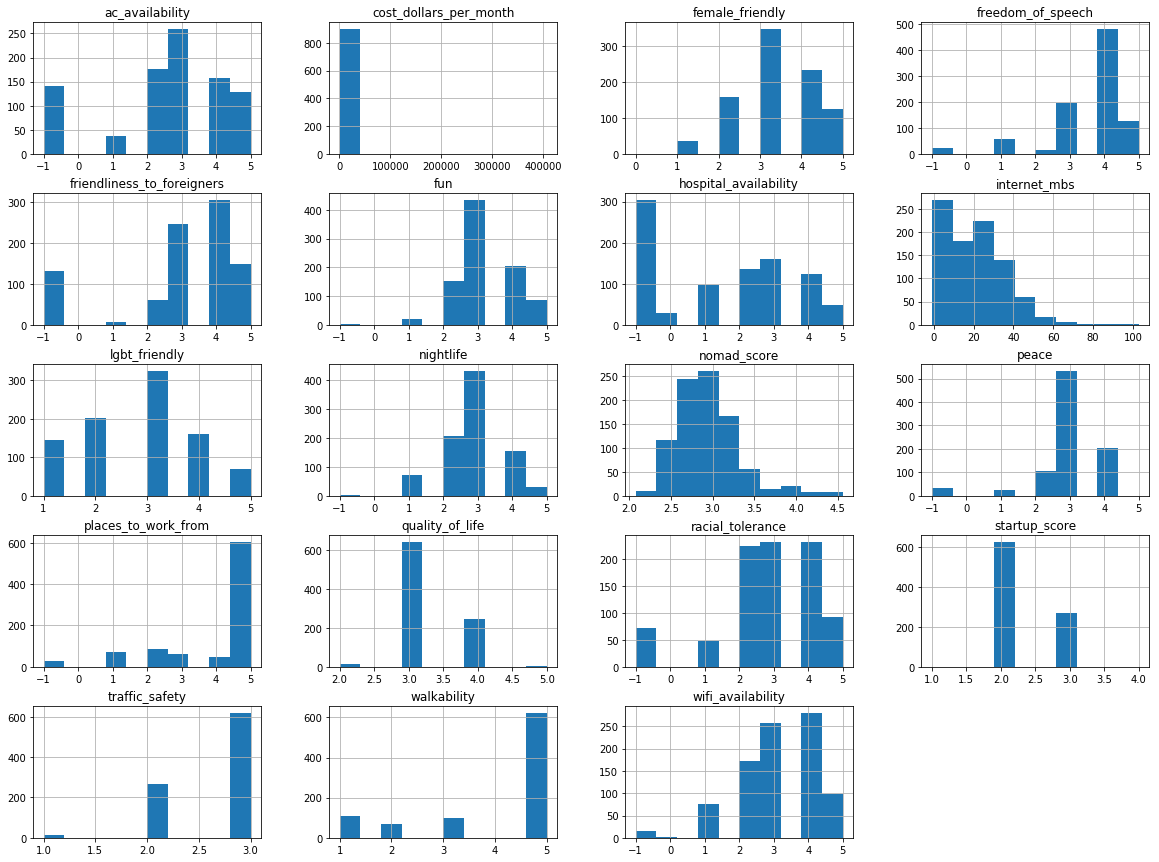

In [53]:
for x in df_cities.hist(figsize=(20,15)):
    x

The other thing you can see in the following histograms is cost_dollars_per_month. We found that there was an outlier in the data, namely "mars-city". :) It is apparently costly to live on Mars. Since it is currently not a vaible option to travel to Mars. We decided it is not neccesary to have it in the data. 

In [54]:
df_cities = df_cities.set_index("city")
df_cities = df_cities.drop("mars-city", axis=0)
df_cities = df_cities.reset_index()

The following histogram shows the cost after the removal. It is still not the best, there are still apparent outliers, that we tried to deal with by scaling and binning. However, we have a cleaner data now.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000018EFC1FD08>]],
      dtype=object)

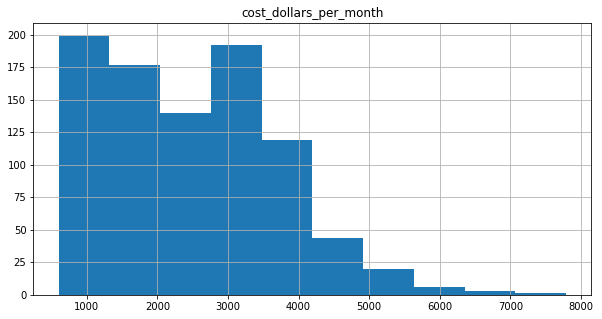

In [55]:
df_cities[["cost_dollars_per_month"]].hist(figsize=(10,5))

### Mean imputing strategy for missing values

In [76]:
#from sklearn.impute import SimpleImputer
#imp = SimpleImputer(strategy='mean', missing_values=-1)

#for x in df_cities.columns:
#    if x != "city":
#        df_cities[x] = imp.fit_transform(df_cities[[x]]).ravel()

### Iterative imputing strategy for missing values

Firstly we scale cost and internet to (1,5) interval of the other features, so it does not influence the data imputation. Large values forces imputer to overfit on this value. 

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(1, 5))

df_cities[['cost_dollars_per_month', 'internet_mbs']] = scaler.fit_transform(df_cities[['cost_dollars_per_month', 'internet_mbs']])


We impute the data.

In [57]:
# Enables experimental imputation of the data.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0, missing_values=-1)

imputed = imp.fit_transform(df_cities.drop(['city'], axis=1))
df_cities.loc[:, df_cities.columns != "city"] = imputed
df_cities

city  hospital_availability  nightlife  female_friendly  \
0    ho-chi-minh-city               1.000000        4.0              3.0   
1               seoul               2.000000        5.0              5.0   
2            alicante               2.000000        3.0              3.0   
3           amsterdam               4.000000        4.0              4.0   
4              london               3.000000        5.0              4.0   
..                ...                    ...        ...              ...   
896          senggigi               1.724657        2.0              2.0   
897           lansing               5.000000        3.0              2.0   
898       vladivostok               1.797712        3.0              3.0   
899            indore               1.000000        2.0              2.0   
900           lucknow               0.000000        3.0              3.0   

     racial_tolerance  walkability  quality_of_life  places_to_work_from  \
0                 2.0          5.0              3.0                  5.0   
1                 2.0          2.0              4.0                  5.0   
2                 2.0          5.0              4.0                  5.0   
3                 4.0          5.0              4.0                  5.0   
4                 5.0          5.0              4.0                  5.0   
..                ...          ...              ...                  ...   
896               2.0          2.0              3.0                  3.0   
897               4.0          5.0              3.0                  1.0   
898               2.0          5.0              3.0                  5.0   
899               1.0          5.0              3.0                  5.0   
900               1.0          5.0              3.0                  5.0   

     friendliness_to_foreigners  freedom_of_speech  startup_score  \
0                       3.00000                1.0            3.0   
1                       4.00000                4.0            3.0   
2                       4.00000                4.0            3.0   
3                       4.00000                5.0            3.0   
4                       4.00000                4.0            3.0   
..                          ...                ...            ...   
896                     3.00000                3.0            2.0   
897                     3.51812                4.0            2.0   
898                     3.00000                3.0            2.0   
899                     2.00000                3.0            2.0   
900                     3.00000                3.0            2.0   

     traffic_safety  ac_availability  lgbt_friendly  fun  wifi_availability  \
0               2.0         3.000000            2.0  5.0                4.0   
1               3.0         5.000000            3.0  4.0                5.0   
2               3.0         3.000000            3.0  4.0                4.0   
3               3.0         2.000000            5.0  4.0                4.0   
4               3.0         4.000000            4.0  5.0                4.0   
..              ...              ...            ...  ...                ...   
896             2.0         2.000000            1.0  2.0                2.0   
897             3.0         3.326788            3.0  3.0                4.0   
898             2.0         2.000000            1.0  2.0                2.0   
899             2.0         2.000000            1.0  4.0                1.0   
900             2.0         2.000000            3.0  3.0                2.0   

     peace  nomad_score  internet_mbs  cost_dollars_per_month  
0      3.0         4.14      1.846154                1.240434  
1      3.0         3.66      1.730769                2.099763  
2      4.0         3.43      2.076923                1.853207  
3      4.0         3.66      1.923077                3.414359  
4      3.0         3.79      1.692308                2.932378  
..     ...          ...      

Scales the data up to its previous values.

In [66]:
df_cities[['cost_dollars_per_month', 'internet_mbs']] = scaler.inverse_transform(df_cities[['cost_dollars_per_month', 'internet_mbs']])

In [59]:
df_cities

city  hospital_availability  nightlife  female_friendly  \
0    ho-chi-minh-city               1.000000        4.0              3.0   
1               seoul               2.000000        5.0              5.0   
2            alicante               2.000000        3.0              3.0   
3           amsterdam               4.000000        4.0              4.0   
4              london               3.000000        5.0              4.0   
..                ...                    ...        ...              ...   
896          senggigi               1.724657        2.0              2.0   
897           lansing               5.000000        3.0              2.0   
898       vladivostok               1.797712        3.0              3.0   
899            indore               1.000000        2.0              2.0   
900           lucknow               0.000000        3.0              3.0   

     racial_tolerance  walkability  quality_of_life  places_to_work_from  \
0                 2.0          5.0              3.0                  5.0   
1                 2.0          2.0              4.0                  5.0   
2                 2.0          5.0              4.0                  5.0   
3                 4.0          5.0              4.0                  5.0   
4                 5.0          5.0              4.0                  5.0   
..                ...          ...              ...                  ...   
896               2.0          2.0              3.0                  3.0   
897               4.0          5.0              3.0                  1.0   
898               2.0          5.0              3.0                  5.0   
899               1.0          5.0              3.0                  5.0   
900               1.0          5.0              3.0                  5.0   

     friendliness_to_foreigners  freedom_of_speech  startup_score  \
0                       3.00000                1.0            3.0   
1                       4.00000                4.0            3.0   
2                       4.00000                4.0            3.0   
3                       4.00000                5.0            3.0   
4                       4.00000                4.0            3.0   
..                          ...                ...            ...   
896                     3.00000                3.0            2.0   
897                     3.51812                4.0            2.0   
898                     3.00000                3.0            2.0   
899                     2.00000                3.0            2.0   
900                     3.00000                3.0            2.0   

     traffic_safety  ac_availability  lgbt_friendly  fun  wifi_availability  \
0               2.0         3.000000            2.0  5.0                4.0   
1               3.0         5.000000            3.0  4.0                5.0   
2               3.0         3.000000            3.0  4.0                4.0   
3               3.0         2.000000            5.0  4.0                4.0   
4               3.0         4.000000            4.0  5.0                4.0   
..              ...              ...            ...  ...                ...   
896             2.0         2.000000            1.0  2.0                2.0   
897             3.0         3.326788            3.0  3.0                4.0   
898             2.0         2.000000            1.0  2.0                2.0   
899             2.0         2.000000            1.0  4.0                1.0   
900             2.0         2.000000            3.0  3.0                2.0   

     peace  nomad_score  internet_mbs  cost_dollars_per_month  
0      3.0         4.14          21.0                  1034.0  
1      3.0         3.66          18.0                  2578.0  
2      4.0         3.43          27.0                  2135.0  
3      4.0         3.66          23.0                  4940.0  
4      3.0         3.79          17.0                  4074.0  
..     ...          ...      

### Histograms after the imputation

The distrubutions of cost and internet are simmilar an we will try to use binning on these data. Most of the other attributes seams to be normally or similarly distributed, except places_to_walk_from, walkability and traffic safety. Those have a single dominant value, 2 of them maximal and 1 mean values. 

After the imputation, we gained some strange artefacts like zero values in hospital and female friendly attributes. Mainly hospital beacause of many missing values. But values still hold representation of the given item what is crucial in calculating distances.

In [60]:
for x in df_cities.hist(figsize=(20,15)):
    x

### Covariance matrix

Since covariance depends on magnitudes of all values, we used scaling once again.

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(1, 5))

df_cities[['cost_dollars_per_month', 'internet_mbs']] = scaler.fit_transform(df_cities[['cost_dollars_per_month', 'internet_mbs']])

covmat = df_cities.cov()
df_cities[['cost_dollars_per_month', 'internet_mbs']] = scaler.inverse_transform(df_cities[['cost_dollars_per_month', 'internet_mbs']])
covmat

hospital_availability  nightlife  female_friendly  \
hospital_availability                    1.302573   0.258496         0.355796   
nightlife                                0.258496   0.842896         0.265292   
female_friendly                          0.355796   0.265292         1.079709   
racial_tolerance                         0.474566   0.242902         0.484909   
walkability                             -0.039759   0.164767         0.369621   
quality_of_life                          0.129644   0.168798         0.276101   
places_to_work_from                     -0.205756   0.076651         0.033476   
friendliness_to_foreigners               0.115985   0.186373         0.264632   
freedom_of_speech                        0.304109   0.217556         0.376214   
startup_score                            0.109330   0.179060         0.209036   
traffic_safety                           0.214338   0.129324         0.224359   
ac_availability                          0.280591   0.252350         0.270455   
lgbt_friendly                            0.510754   0.371681         0.678220   
fun                                      0.111777   0.347419         0.194507   
wifi_availability                        0.431062   0.346655         0.459745   
peace                                    0.167859   0.070121         0.315539   
nomad_score                             -0.068254   0.106366         0.027638   
internet_mbs                             0.289504   0.177431         0.215638   
cost_dollars_per_month                   0.368824   0.162633         0.279462   

                            racial_tolerance  walkability  quality_of_life  \
hospital_availability               0.474566    -0.039759         0.129644   
nightlife                           0.242902     0.164767         0.168798   
female_friendly                     0.484909     0.369621         0.276101   
racial_tolerance                    1.156076     0.306885         0.178987   
walkability                         0.306885     2.180661         0.172621   
quality_of_life                     0.178987     0.172621         0.225702   
places_to_work_from                -0.239554     0.403045         0.167438   
friendliness_to_foreigners          0.296585     0.323788         0.154319   
freedom_of_speech                   0.580745     0.180239         0.167994   
startup_score                       0.112187     0.165535         0.149057   
traffic_safety                      0.251223     0.101730         0.080734   
ac_availability                     0.230896     0.180049         0.125842   
lgbt_friendly                       0.678716     0.323961         0.293606   
fun                                 0.121251     0.101395         0.148661   
wifi_availability                   0.511342     0.310056         0.166644   
peace                               0.238749     0.094687         0.130576   
nomad_score                        -0.068302     0.096473         0.073568   
internet_mbs                        0.306146     0.141210         0.088337   
cost_dollars_per_month              0.387842     0.023026         0.082671   

                            places_to_work_from  friendliness_to_foreigners  \
hospital_availability                 -0.205756                    0.115985   
nightlife                              0.076651                    0.186373   
female_friendly                        0.033476                    0.264632   
racial_tolerance                      -0.239554                    0.296585   
walkability                            0.403045                    0.323788   
quality_of_life                        0.167438                    0.154319   
places_to_work_from                    1.836670                    0.187365   
friendliness_to_foreigners             0.187365                    0.702050   
freedom_of_speech                      0.023753                    0.211155   
startup_score                          0.237625         

According to covariance, places_to_work_from and walkability are somehow similar, same goes for female_friendly/lgbt_friendly, and nightlife/fun, and racial_tolerance/freedom_of_speech. These values are not significant, but tells us something about the similarity among some features and when you look at them, they somehow make sense.

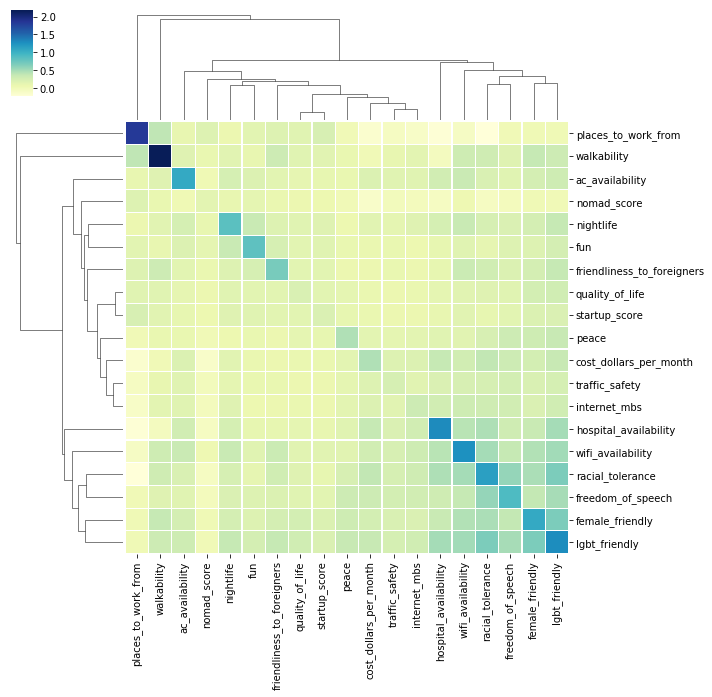

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

cg = sns.clustermap(covmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 

### Corellation matrix

To better find connections between attributes, we calculated correlation matrix on the imputed data. This time magnitude of the attribute does not make a difference so, we did not have to scale it. 

From the following correlation matrix. There are a few correlations similar to the covariance like female_friendly/lgbt_friendly with correlation 0.57. The most significant correlation 0.67 was between startup_score and quality_of_life. Correlation between fun and nightlife, for example, was only 0.41. None of the these correleations are large enough on their own to eliminate one of them. Given this, our decision was to use all of the attributes in our final implementation.

In [74]:
corrmat = df_cities.corr()
corrmat

hospital_availability  nightlife  female_friendly  \
hospital_availability                    1.000000   0.246698         0.300018   
nightlife                                0.246698   1.000000         0.278089   
female_friendly                          0.300018   0.278089         1.000000   
racial_tolerance                         0.386725   0.246066         0.434024   
walkability                             -0.023591   0.121532         0.240885   
quality_of_life                          0.239102   0.387000         0.559302   
places_to_work_from                     -0.133026   0.061605         0.023772   
friendliness_to_foreigners               0.121288   0.242277         0.303951   
freedom_of_speech                        0.278844   0.247981         0.378891   
startup_score                            0.206389   0.420202         0.433425   
traffic_safety                           0.376383   0.282308         0.432736   
ac_availability                          0.236329   0.264217         0.250198   
lgbt_friendly                            0.392461   0.355033         0.572405   
fun                                      0.107767   0.416388         0.205975   
wifi_availability                        0.334947   0.334849         0.392375   
peace                                    0.216756   0.112561         0.447535   
nomad_score                             -0.160418   0.310771         0.071348   
internet_mbs                             0.444299   0.338505         0.363491   
cost_dollars_per_month                   0.474675   0.260196         0.395047   

                            racial_tolerance  walkability  quality_of_life  \
hospital_availability               0.386725    -0.023591         0.239102   
nightlife                           0.246066     0.121532         0.387000   
female_friendly                     0.434024     0.240885         0.559302   
racial_tolerance                    1.000000     0.193281         0.350398   
walkability                         0.193281     1.000000         0.246054   
quality_of_life                     0.350398     0.246054         1.000000   
places_to_work_from                -0.164398     0.201393         0.260059   
friendliness_to_foreigners          0.329210     0.261687         0.387674   
freedom_of_speech                   0.565229     0.127728         0.370048   
startup_score                       0.224801     0.241514         0.675975   
traffic_safety                      0.468273     0.138067         0.340581   
ac_availability                     0.206427     0.117203         0.254625   
lgbt_friendly                       0.553581     0.192391         0.541979   
fun                                 0.124087     0.075554         0.344318   
wifi_availability                   0.421751     0.186202         0.311071   
peace                               0.327246     0.094498         0.405063   
nomad_score                        -0.170399     0.175242         0.415379   
internet_mbs                        0.498721     0.167492         0.325683   
cost_dollars_per_month              0.529835     0.022904         0.255603   

                            places_to_work_from  friendliness_to_foreigners  \
hospital_availability                 -0.133026                    0.121288   
nightlife                              0.061605                    0.242277   
female_friendly                        0.023772                    0.303951   
racial_tolerance                      -0.164398                    0.329210   
walkability                            0.201393                    0.261687   
quality_of_life                        0.260059                    0.387674   
places_to_work_from                    1.000000                    0.165001   
friendliness_to_foreigners             0.165001                    1.000000   
freedom_of_speech                      0.018342                    0.263724   
startup_score                          0.377767         

In [75]:
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 

## KNN clustering

Similarity between the cities is in our algorithms defined by the distance between them. However, it may be useful to look what clusters built on their distances look like. It may give us some information about the structure of data. 

It can be used as kind of recommendation as well, unlike the simple distance measures, it does not look for the closest match. It finds cities that are similar and we can sample cluster to get similar ones.

Here we clustered the data into 10 clusters using KNN clustering. And added it as a 

In [86]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters=10,random_state=0).fit(df_cities.drop(['city'], axis=1))
df_cities.loc[:,'labels'] = clustering.labels_
df_cities.head(10)

city  hospital_availability  nightlife  female_friendly  \
0  ho-chi-minh-city               1.000000        4.0              3.0   
1             seoul               2.000000        5.0              5.0   
2          alicante               2.000000        3.0              3.0   
3         amsterdam               4.000000        4.0              4.0   
4            london               3.000000        5.0              4.0   
5         nha-trang               2.211105        3.0              3.0   
6           da-nang               2.017302        2.0              3.0   
7            mui-ne               1.938101        2.0              3.0   
8             paris               4.000000        5.0              4.0   
9         hong-kong               3.081699        5.0              3.0   

   racial_tolerance  walkability  quality_of_life  places_to_work_from  \
0               2.0          5.0              3.0                  5.0   
1               2.0          2.0              4.0                  5.0   
2               2.0          5.0              4.0                  5.0   
3               4.0          5.0              4.0                  5.0   
4               5.0          5.0              4.0                  5.0   
5               3.0          3.0              3.0                  5.0   
6               3.0          5.0              3.0                  5.0   
7               3.0          5.0              3.0                  5.0   
8               3.0          5.0              4.0                  5.0   
9               2.0          5.0              4.0                  5.0   

   friendliness_to_foreigners  freedom_of_speech  ...  traffic_safety  \
0                         3.0                1.0  ...             2.0   
1                         4.0                4.0  ...             3.0   
2                         4.0                4.0  ...             3.0   
3                         4.0                5.0  ...             3.0   
4                         4.0                4.0  ...             3.0   
5                         4.0                1.0  ...             2.0   
6                         4.0                1.0  ...             2.0   
7                         4.0                1.0  ...             2.0   
8                         3.0                4.0  ...             3.0   
9                         3.0                4.0  ...             3.0   

   ac_availability  lgbt_friendly  fun  wifi_availability     peace  \
0              3.0            2.0  5.0                4.0  3.000000   
1              5.0            3.0  4.0                5.0  3.000000   
2              3.0            3.0  4.0                4.0  4.000000   
3              2.0            5.0  4.0                4.0  4.000000   
4              4.0            4.0  5.0                4.0  3.000000   
5              2.0            3.0  4.0                3.0  3.000000   
6              3.0            2.0  3.0                4.0  3.000000   
7              3.0            2.0  3.0                3.0  3.000000   
8              5.0            4.0  4.0                3.0  3.000000   
9              5.0            4.0  5.0                1.0  3.334368   

   nomad_score  internet_mbs  cost_dollars_per_month  labels  
0         4.14          21.0                  1034.0       6  
1         3.66          18.0                  2578.0       8  
2         3.43          27.0                  2135.0       5  
3         3.66          23.0                  4940.0       4  
4         3.79          17.0                  4074.0       0  
5         3.35          11.0                   648.0       6  
6         3.82          14.0                  1031.0       6  
7         3.16           8.0                   874.0       6  
8         3.62          25.0                  4081.0       0  
9         3.07          70.0                  2406.0       5  

[10 rows x 21 columns]

We looked if it strongly correlates with some of the attributes. The most significant was a correllation with cost_dollars_per_month, but is was not significant.

In [87]:
corrmat = df_cities.corr()
corrmat["labels"]

hospital_availability        -0.027889
nightlife                    -0.032095
female_friendly               0.050810
racial_tolerance              0.034260
walkability                   0.062710
quality_of_life               0.079600
places_to_work_from           0.017860
friendliness_to_foreigners    0.021320
freedom_of_speech             0.041044
startup_score                 0.060033
traffic_safety                0.012522
ac_availability              -0.011543
lgbt_friendly                -0.009387
fun                           0.026918
wifi_availability             0.022093
peace                         0.061866
nomad_score                   0.062986
internet_mbs                  0.023491
cost_dollars_per_month       -0.106663
labels                        1.000000
Name: labels, dtype: float64

### PCA

We reduced the data into 2 dimensions using PCA and we found an interesting property. Clusters were easily identifiable and depended simply on the pricipal component that has pretty hight values. High values are present due to high values of cost_dollars_per_month. The clusters seams to fit mainly based on this principal component. It can mean that our predictions may be largely influenced by the cost, if we do not scale or bin internet and cost attributes. 

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df_cities.drop(['labels','city'], axis=1))

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df_cities], axis = 1)
finalDf.head(10)
sns.set(style='ticks')

fg = sns.FacetGrid(data=finalDf, hue='labels', aspect=1.61, height=5)
fg.map(plt.scatter, 'principal component 1', 'principal component 2').add_legend()

As you can see, clusters are mainly of the simillar cost. So binning or scaling may be a good idea.

In [97]:
finalDf.sort_values(by=['principal component 1'], ascending=False).head(10)

principal component 1  principal component 2              city  \
674            5305.398349             -21.957519          key-west   
368            4406.288700             -36.180822           mykonos   
169            4286.496326              -3.351485            monaco   
479            3926.330817             -28.034963          hamilton   
245            3809.334030             -27.229953       panama-city   
519            3762.348456             -24.910564             kauai   
890            3701.445400              -9.601565       palm-desert   
860            3653.218035             -45.212312    amundsen-scott   
865            3600.261815             -37.906577  charlotte-amalie   
581            3471.219080             -44.231480         jamestown   

     hospital_availability  nightlife  female_friendly  racial_tolerance  \
674               3.000000        2.0              4.0               3.0   
368               3.344372        4.0              3.0               3.0   
169               3.000000        4.0              4.0               3.0   
479               3.068747        4.0              3.0               4.0   
245               2.000000        4.0              3.0               4.0   
519               3.364400        4.0              3.0               4.0   
890               3.771546        3.0              4.0               4.0   
860               3.608560        1.0              4.0               4.0   
865               2.923083        2.0              4.0               4.0   
581               3.232107        1.0              3.0               3.0   

     walkability  quality_of_life  places_to_work_from  ...  traffic_safety  \
674          1.0              3.0                  5.0  ...             3.0   
368          2.0              3.0                  5.0  ...             3.0   
169          5.0              3.0                  2.0  ...             3.0   
479          5.0              4.0                  5.0  ...             3.0   
245          5.0              3.0                  5.0  ...             3.0   
519          5.0              3.0                  3.0  ...             3.0   
890          3.0              3.0                  1.0  ...             3.0   
860          2.0              3.0                  1.0  ...             3.0   
865          5.0              3.0                  3.0  ...             3.0   
581          1.0              3.0                  1.0  ...             3.0   

     ac_availability  lgbt_friendly       fun  wifi_availability     peace  \
674         4.000000            4.0  5.000000                4.0  3.000000   
368         4.000000            2.0  4.000000                3.0  3.000000   
169         4.000000            3.0  5.000000                3.0  3.377729   
479         3.000000            2.0  3.000000                3.0  2.869290   
245         5.000000            3.0  3.000000                4.0  3.000000   
519         4.000000            3.0  5.000000                4.0  3.000000   
890         3.626149            3.0  3.000000                4.0  3.000000   
860         4.000000            5.0  3.000000                4.0  3.538668   
865         3.000000            2.0  3.194804                4.0  2.873357   
581         2.842572            4.0  1.000000                2.0  3.320567   

     nomad_score  internet_mbs  cost_dollars_per_month  labels  
674         2.83          33.0                  7789.0       3  
368         2.90          13.0                  6890.0       3  
169         2.92          45.0                  6770.0       3  
479         2.77          18.0                  6410.0       3  
245         2.78          18.0                  6293.0       3  
519         2.78          20.0                  6246.0       3  
890         2.59          35.0                  6185.0       3  
860         2.49          -1.0                  6137.0       3  
865         2.40           6.0                  6084.0       3  
581    

In [95]:
finalDf.sort_values(by=['principal component 1']).head(10)

principal component 1  principal component 2       city  \
790           -1881.614400              -0.987330     matara   
276           -1858.628947              -3.150976  ahmedabad   
896           -1853.616309              -1.242203   senggigi   
722           -1845.655918              -7.316725     banjul   
344           -1844.629573              -3.333644  moradabad   
5             -1835.595971               1.760048  nha-trang   
342           -1812.635519              -4.388948     jaipur   
221           -1798.632732              -4.299792    pokhara   
442           -1796.605827               0.389470    chennai   
223           -1795.640394              -5.372499  kathmandu   

     hospital_availability  nightlife  female_friendly  racial_tolerance  \
790               2.223885        2.0              2.0          2.000000   
276               2.000000        2.0              3.0          1.000000   
896               1.815129        2.0              2.0          2.000000   
722               1.189652        1.0              1.0          2.000000   
344               1.921289        2.0              2.0          2.000000   
5                 2.398723        3.0              3.0          3.000000   
342               3.000000        3.0              3.0          1.000000   
221               2.020776        2.0              3.0          3.245582   
442               1.000000        3.0              3.0          1.000000   
223               1.000000        2.0              3.0          2.959399   

     walkability  quality_of_life  places_to_work_from  ...  traffic_safety  \
790          1.0              3.0                  5.0  ...             3.0   
276          5.0              3.0                  5.0  ...             2.0   
896          2.0              3.0                  3.0  ...             2.0   
722          5.0              2.0                  2.0  ...             2.0   
344          1.0              3.0                  5.0  ...             2.0   
5            3.0              3.0                  5.0  ...             2.0   
342          5.0              3.0                  5.0  ...             2.0   
221          5.0              3.0                  2.0  ...             2.0   
442          5.0              3.0                  5.0  ...             2.0   
223          5.0              3.0                  5.0  ...             2.0   

     ac_availability  lgbt_friendly  fun  wifi_availability  peace  \
790         3.000000            2.0  4.0                3.0    3.0   
276         4.000000            1.0  4.0                1.0    2.0   
896         2.000000            1.0  2.0                2.0    3.0   
722         1.000000            1.0  2.0                1.0    3.0   
344         2.000000            1.0  3.0                2.0    2.0   
5           2.000000            3.0  4.0                3.0    3.0   
342         3.000000            2.0  2.0                2.0    2.0   
221         2.950423            3.0  5.0                4.0    3.0   
442         2.000000            1.0  2.0                1.0    2.0   
223         2.000000            3.0  5.0                4.0    3.0   

     nomad_score  internet_mbs  cost_dollars_per_month  labels  
790         3.20           8.0                   602.0       8  
276         2.94           6.0                   625.0       8  
896         2.99           8.0                   630.0       8  
722         2.77           2.0                   638.0       8  
344         2.69           6.0                   639.0       8  
5           3.35          11.0                   648.0       8  
342         2.84           5.0                   671.0       8  
221         3.52           5.0                   685.0       8  
442         3.02          10.0                   687.0       8  
223         3.48           4.0                   688.0       8  

[10 rows x 23 columns]

In [90]:
finalDf.sort_values(by=['principal component 2'], ascending=False).head(10)

principal component 1  principal component 2              city  labels
605             974.937777              75.962226  andorra-la-vella       2
74              424.824825              60.362613         singapore       7
489           -1657.245257              56.440254        yogyakarta       8
871             541.777703              52.594730             provo      12
9               -77.254931              49.516795         hong-kong      10
619             169.735868              47.076834       kansas-city       3
770           -1062.292939              46.712494      lake-balaton      17
864             141.696594              41.152986           visalia       3
634             187.695728              40.873688          scranton       3
264             936.706372              40.128639            austin       2

If we scale during fitting PCA. Principal components look differently and clusters are visible, but not that much.

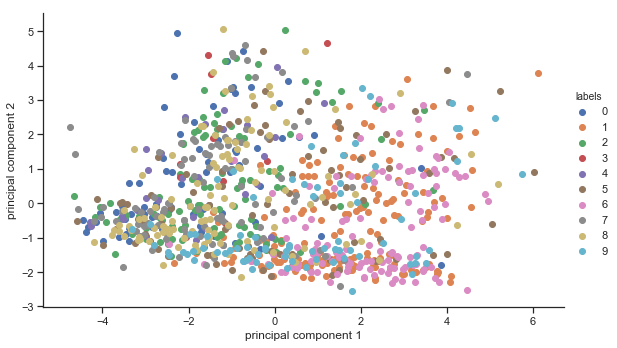

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

scaler = MinMaxScaler(feature_range=(1, 5))

df_cities[['cost_dollars_per_month', 'internet_mbs']] = scaler.fit_transform(df_cities[['cost_dollars_per_month', 'internet_mbs']])

principalComponents = pca.fit_transform(df_cities.drop(['labels','city'], axis=1))

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df_cities], axis = 1)
finalDf.head(10)
sns.set(style='ticks')

df_cities[['cost_dollars_per_month', 'internet_mbs']] = scaler.inverse_transform(df_cities[['cost_dollars_per_month', 'internet_mbs']])

fg = sns.FacetGrid(data=finalDf, hue='labels', aspect=1.61, height=5)
fg.map(plt.scatter, 'principal component 1', 'principal component 2').add_legend()



## 5. Try to evaluate and assign important aspect to each city (art, nature, spot, nightlife, ...)

## 6. Come up with explanations of the recommendations (generate multiple sample recommendations)
**To be done:** Test the aforementioned algorithms/approaches on multiple 'sample' users